In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='dark')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

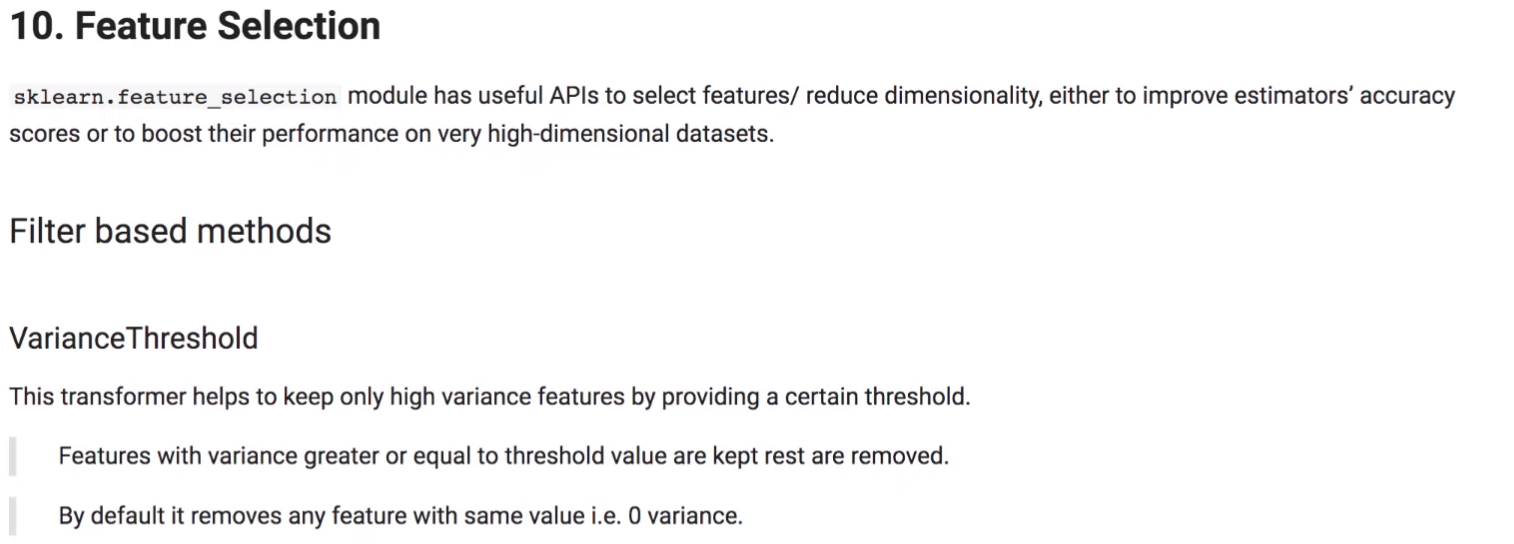

In [10]:
data = [
    {'age': 4, 'height': 96.0},
    {'age': 1, 'height': 73.9},
    {'age': 3, 'height': 88.9},
    {'age': 2, 'height': 81.6},        
]

from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis=0), data_transformed

(array([ 1.25 , 67.735]),
 array([[ 4. , 96. ],
        [ 1. , 73.9],
        [ 3. , 88.9],
        [ 2. , 81.6]]))

In [11]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

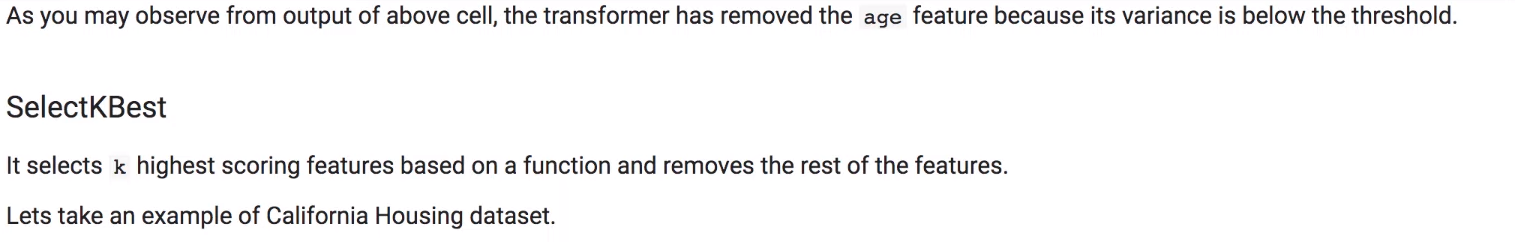

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# dowload data
X_california, y_california = fetch_california_housing(return_X_y=True)

# select a subset of data
X, y = X_california[:2000, :], y_california[:2000]

print(f'Shape of feature matrix before feature selection:{X.shape}')

Shape of feature matrix before feature selection:(2000, 8)


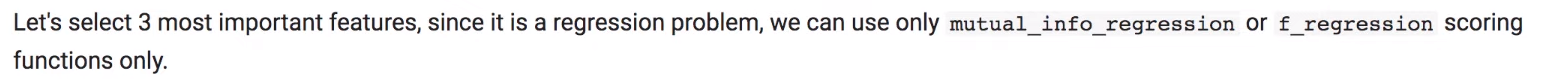

In [13]:
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X, y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


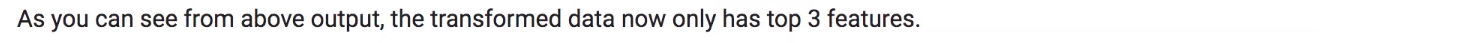

In [14]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

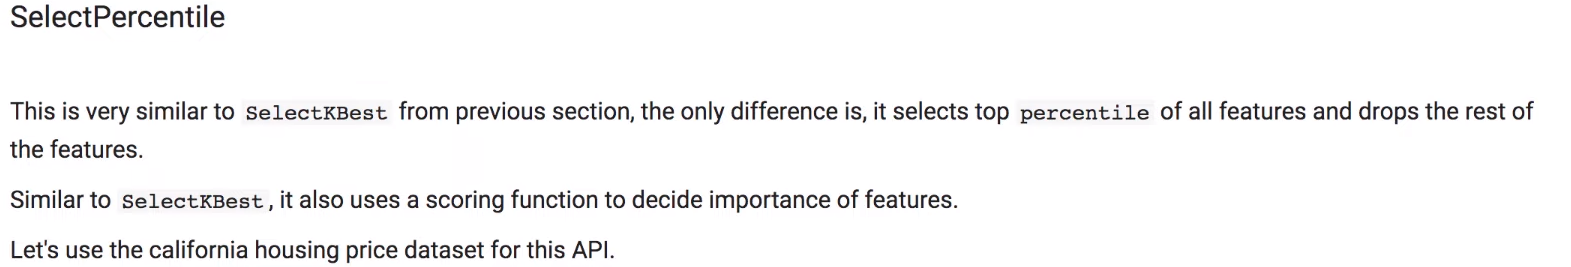

In [15]:
from sklearn.feature_selection import SelectPercentile

sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X, y)

print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


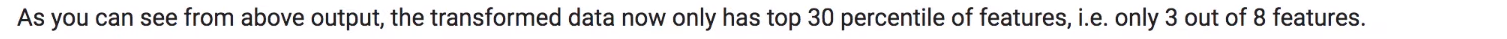
    

In [16]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

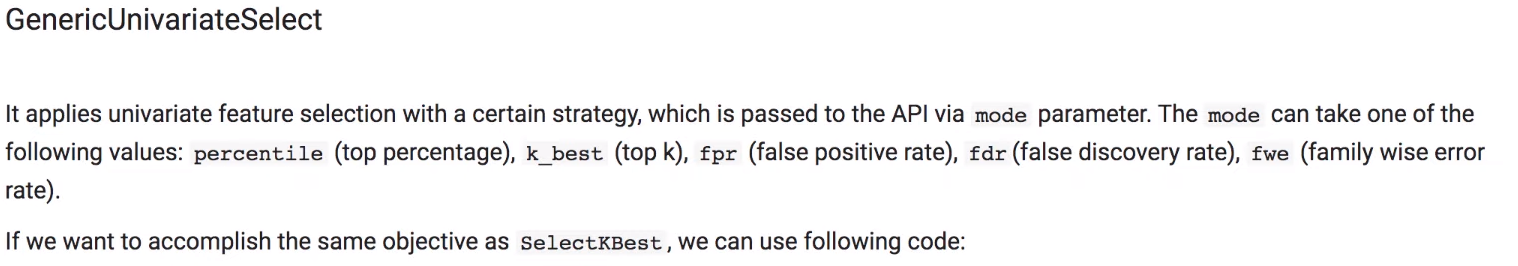
    

In [48]:
from sklearn.feature_selection import GenericUnivariateSelect

gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X, y)

print(f'Shape of feature matrix before feature selection:{X.shape}')
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 8)
Shape of feature matrix after feature selection:(2000, 3)


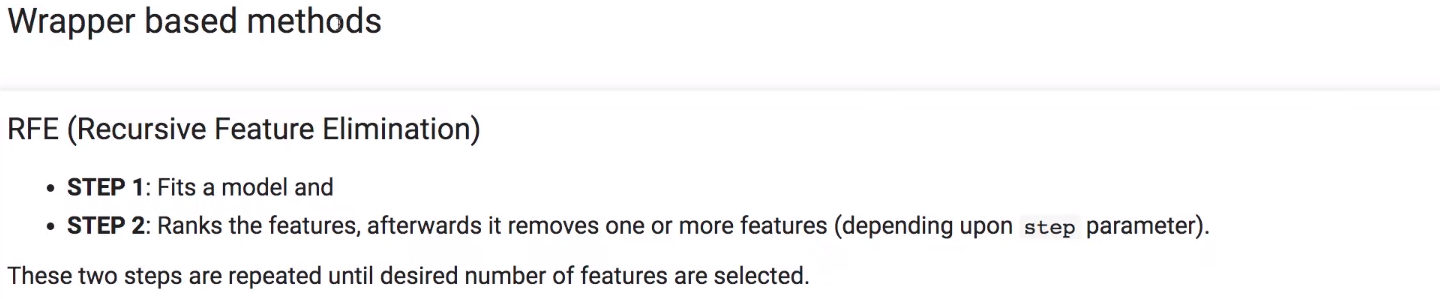
    

In [49]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

# support_attribute is a boolean array
# marking which features are selected
print(selector.support_)

# rank for each feature
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least
print(f'Rank of each feature is: {selector.ranking_}')

[ True False False False False False  True  True]
Rank of each feature is: [1 5 4 3 6 2 1 1]


In [53]:
X_new = selector.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


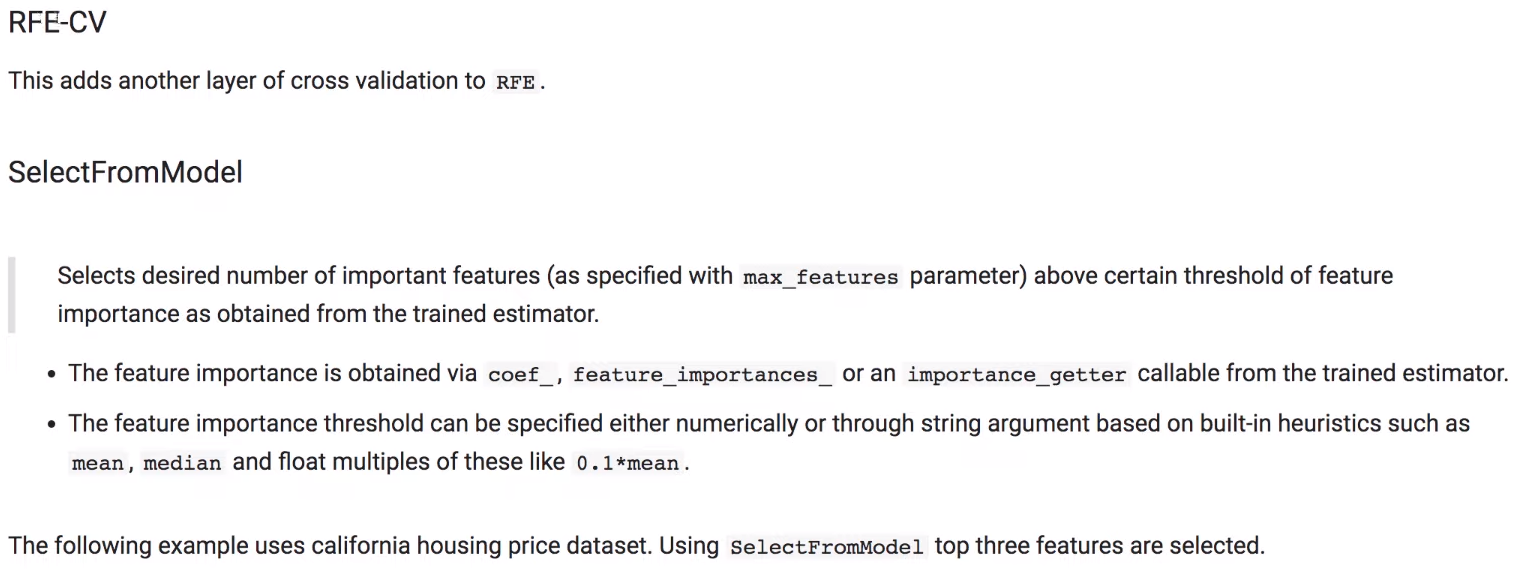

In [12]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coeficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')

t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Coeficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:(2000, 3)


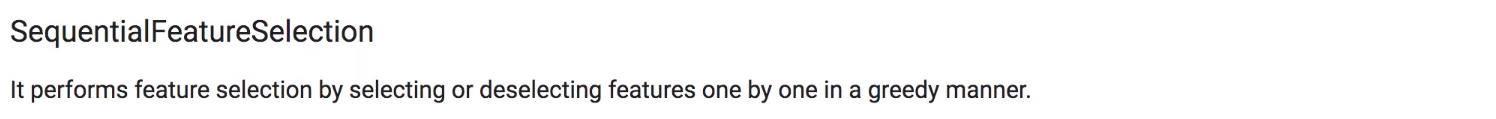

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector

In [14]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: total: 453 ms
Wall time: 156 ms


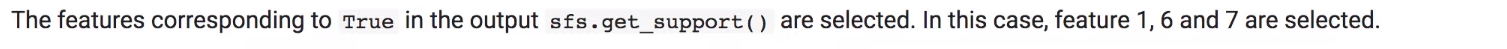

In [15]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: total: 875 ms
Wall time: 241 ms


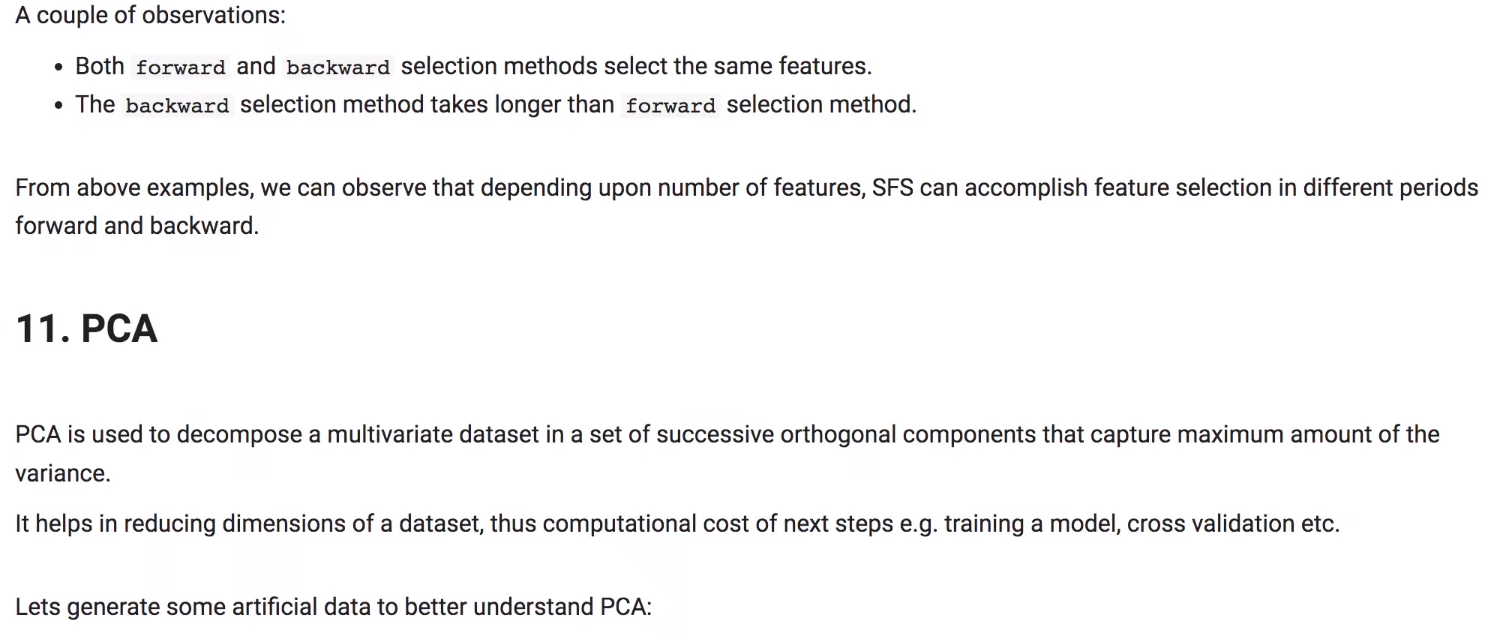

#### Training Data

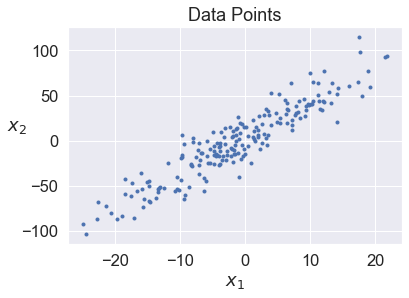

In [16]:
# Training data
w1 = 4
w0 = 0
n = 200
X = 10 * np.random.normal(0, 1, n)

# Obtain y = w0 + w1 * X + noise. 
y = w0 + w1 * X + np.random.normal(0, 1, n)*15

X = np.column_stack([X, y])

# plot
f = plt.figure()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

plt.plot(X[:,0], X[:,1], "b.")
plt.title('Data Points')
plt.grid(True)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', rotation=0, fontsize=18)
# plt.axis([0, 10, 0, 40])

plt.show()

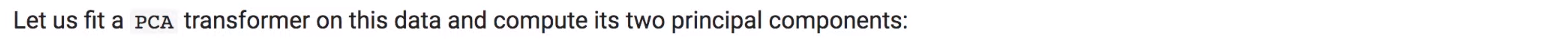

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

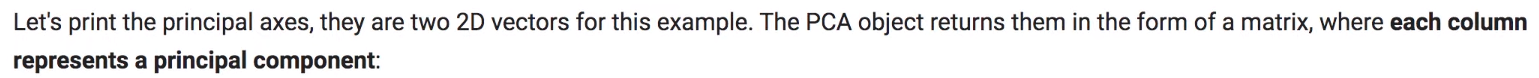

In [18]:
print(f'The {pca.n_components_} principal axes are\n', pca.components_)

The 2 principal axes are
 [[ 0.21797856  0.97595356]
 [ 0.97595356 -0.21797856]]


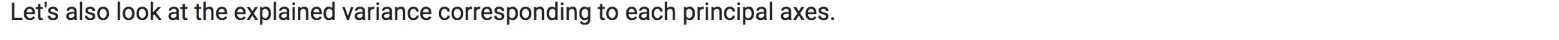

In [19]:
print(f'Explained variance by each component', pca.explained_variance_)

Explained variance by each component [1751.62390737   12.0730815 ]


In [20]:
print(f'Mean across x1 and x2 dimensions is: ', pca.mean_)

Mean across x1 and x2 dimensions is:  [-1.28728107 -1.16289428]


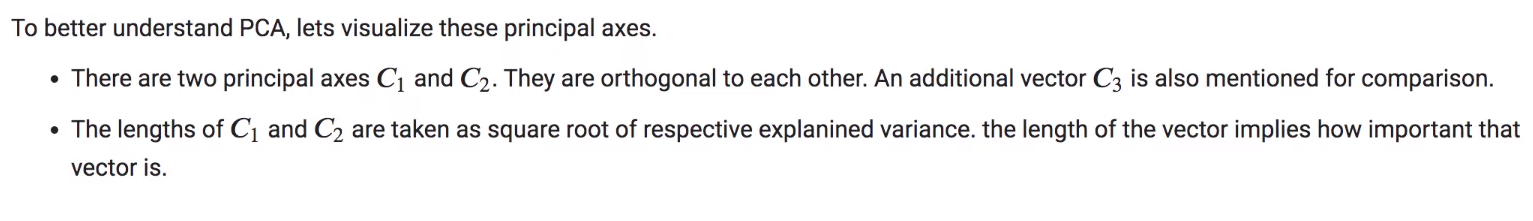

In [21]:
# draw projections of data points on different vectors
projections = X @ pca.components_
print(projections.shape)

arbitrary_projection = X @ c3
print(arbitrary_projection.shape)

(200, 2)


NameError: name 'c3' is not defined

NameError: name 'arbitrary_projection' is not defined

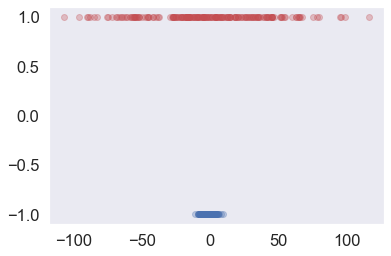

In [22]:
# plt.figure(figsize=(8,6))
plt.scatter(projections[:, 0], 1+np.zeros((200, 1)), alpha=0.3, color='r')
plt.scatter(projections[:, 1], -1+np.zeros((200, 1)), alpha=0.3, color='b')
plt.scatter(arbitrary_projection, np.zeros((200,)), alpha=0.3, color='grey')

plt.legend(['$\mathbf{C_1}$', '$\mathbf{C_2}$', '$\mathbf{C_3}$'], prop={'size':16})
plt.title('Variance covered by different vectors', size=20)
plt.ylim([-1.5, -1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([], [])
plt.xlabel('$z$', size=20)
plt.show()

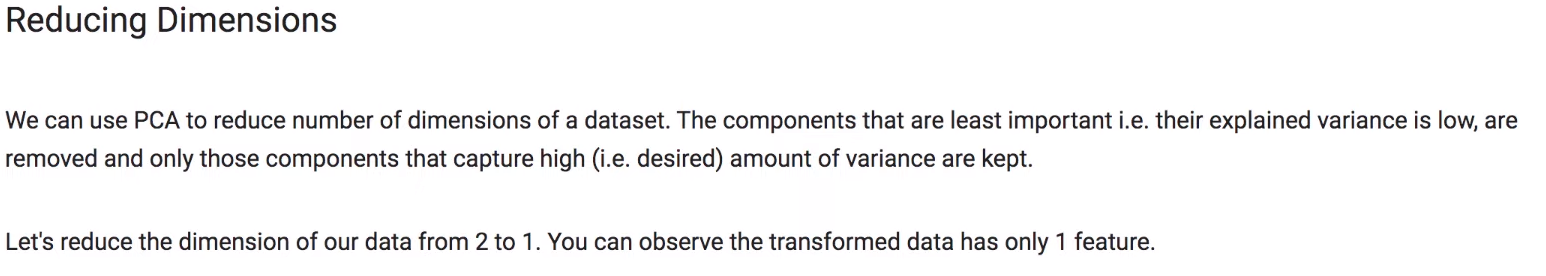

In [23]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape:', X.shape)
print('transformed shape', X_pca.shape)

original shape: (200, 2)
transformed shape (200, 1)


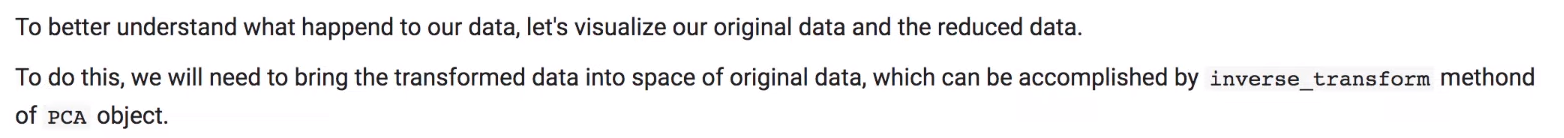

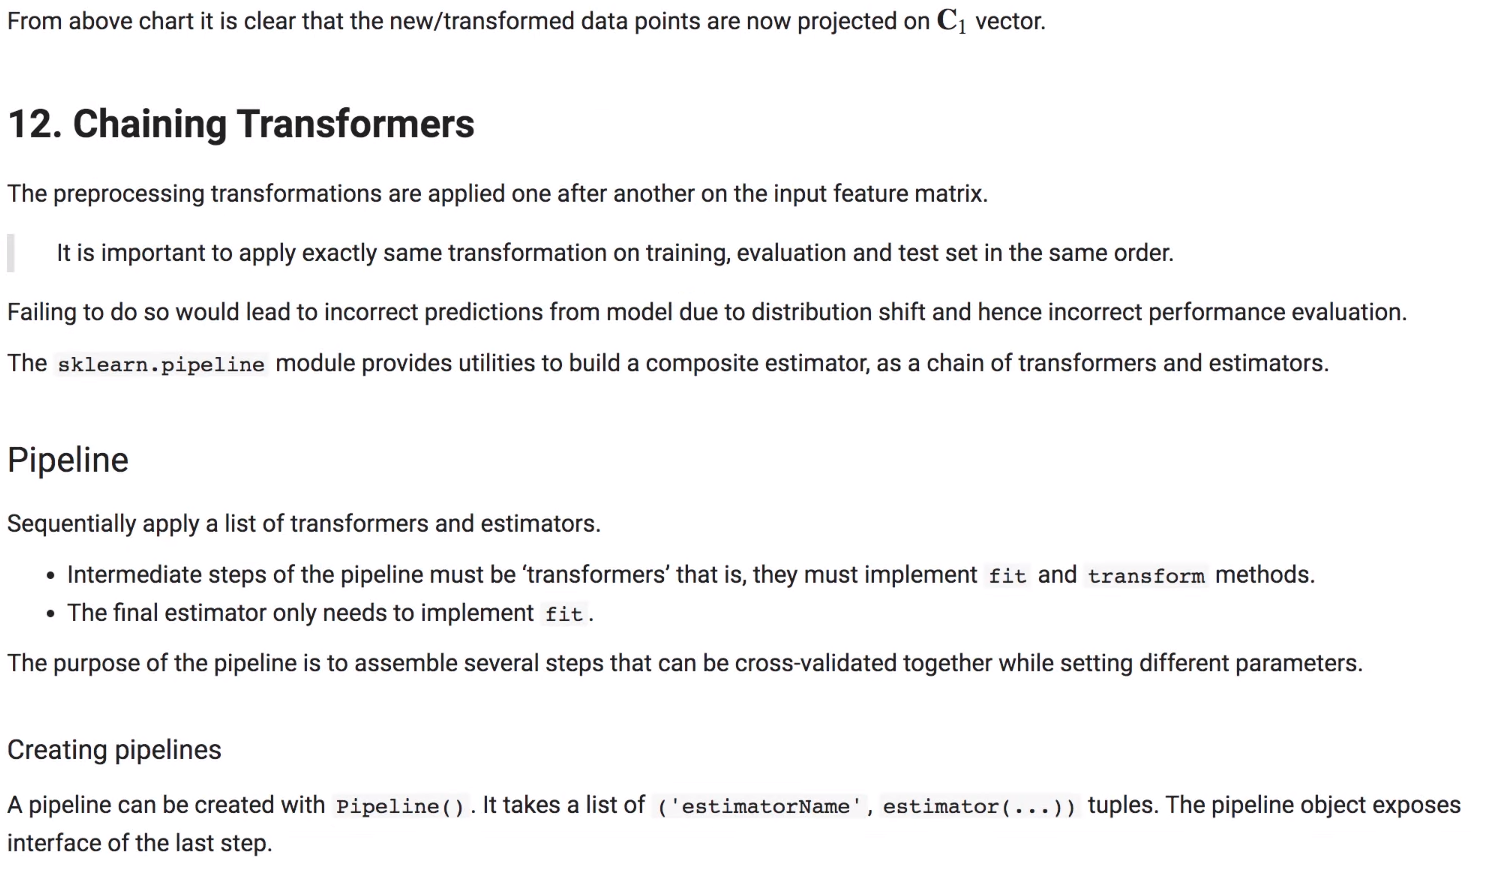

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators = [
    ('simpleImputer', SimpleImputer()),
    ('standardScaler', StandardScaler()),
]
pipe = Pipeline(steps=estimators)

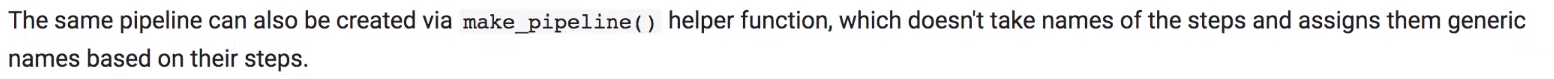

In [25]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    SimpleImputer(), 
    StandardScaler()
)

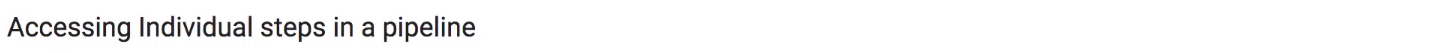

In [26]:
from sklearn.decomposition import PCA
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression()),
]
pipe = Pipeline(steps=estimators)

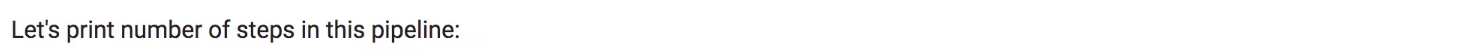

In [27]:
print(len(pipe.steps))

3


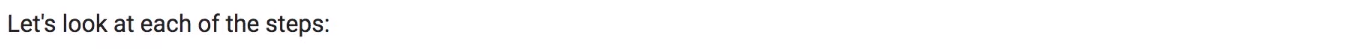

In [28]:
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


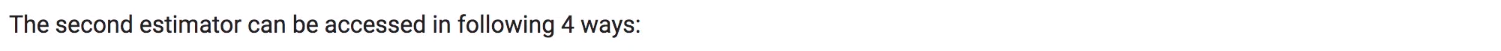

In [29]:
print(pipe.named_steps.pca)

PCA()


In [30]:
pipe.steps[1]

('pca', PCA())

In [31]:
pipe[1]

PCA()

In [32]:
pipe['pca']

PCA()

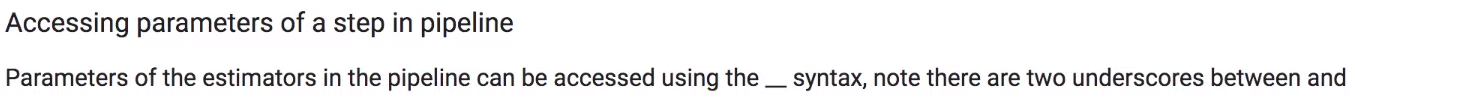

In [33]:
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression()),
]
pipe = Pipeline(steps=estimators)

pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

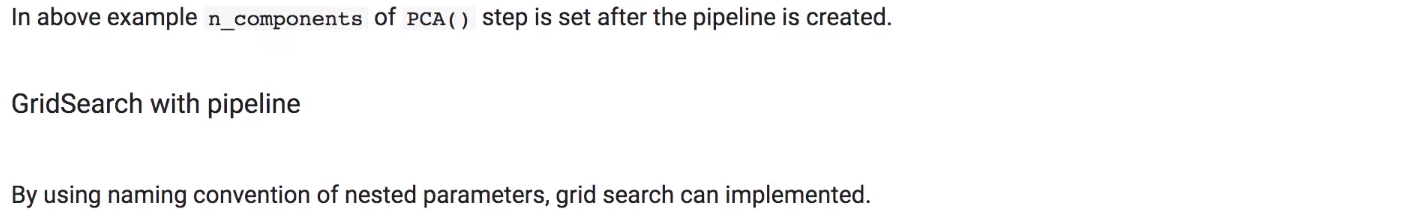

In [34]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    imputer=[
        'passthrough',
        SimpleImputer(),
        KNNImputer()
    ],
    clf=[SVC(), LogisticRegression()],
    clf__C=[0.1, 10, 100]
)
grid_search = GridSearchCV(pipe, param_grid=param_grid)

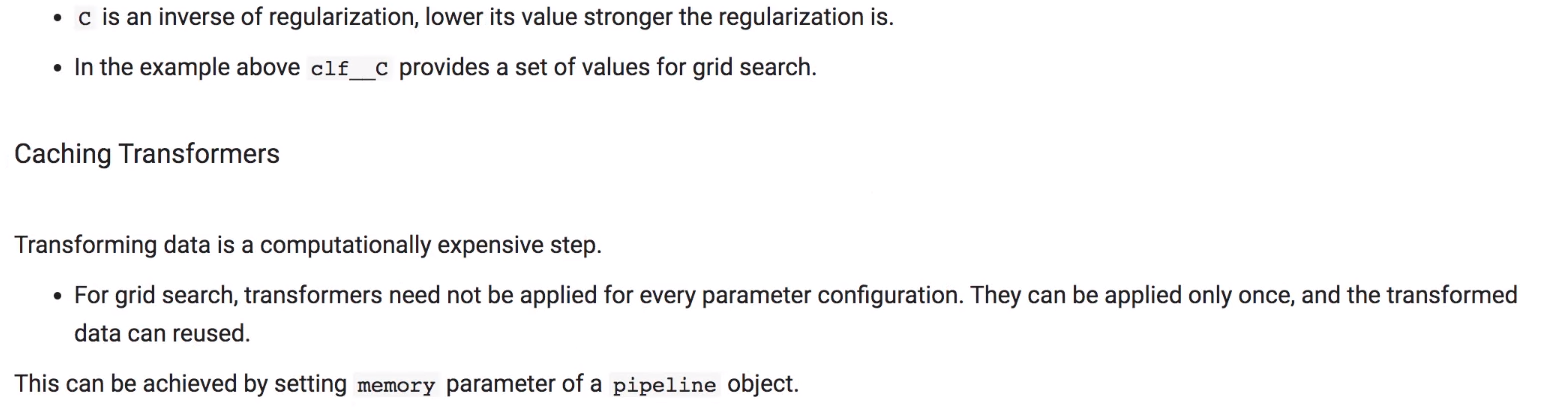

In [35]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

In [36]:
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA(2)),
    ('regressor', LinearRegression()),
]
pipe = Pipeline(steps=estimators, memory=tempDirPath)

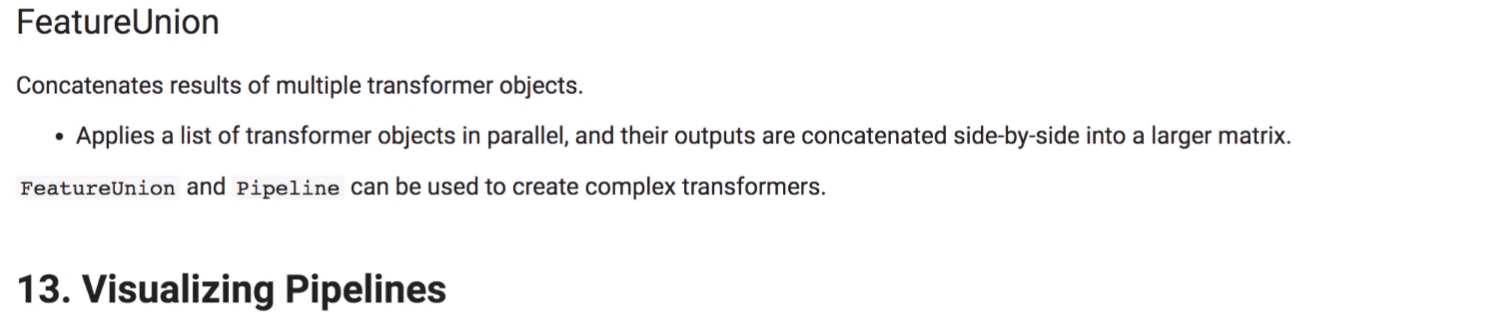

In [37]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('selector', ColumnTransformer([(
        'select_first_4',
        'passthrough',
        slice(0, 4),
    )])),
    ('imputer', SimpleImputer(strategy='median')),
    ('Std_scaler', StandardScaler()),
])
cat_pipeline = ColumnTransformer([('lable_binarizer', LabelBinarizer(), [4]),])
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [38]:
from sklearn import set_config
set_config(display='diagram')

# displays HTML representation in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('Std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('lable_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

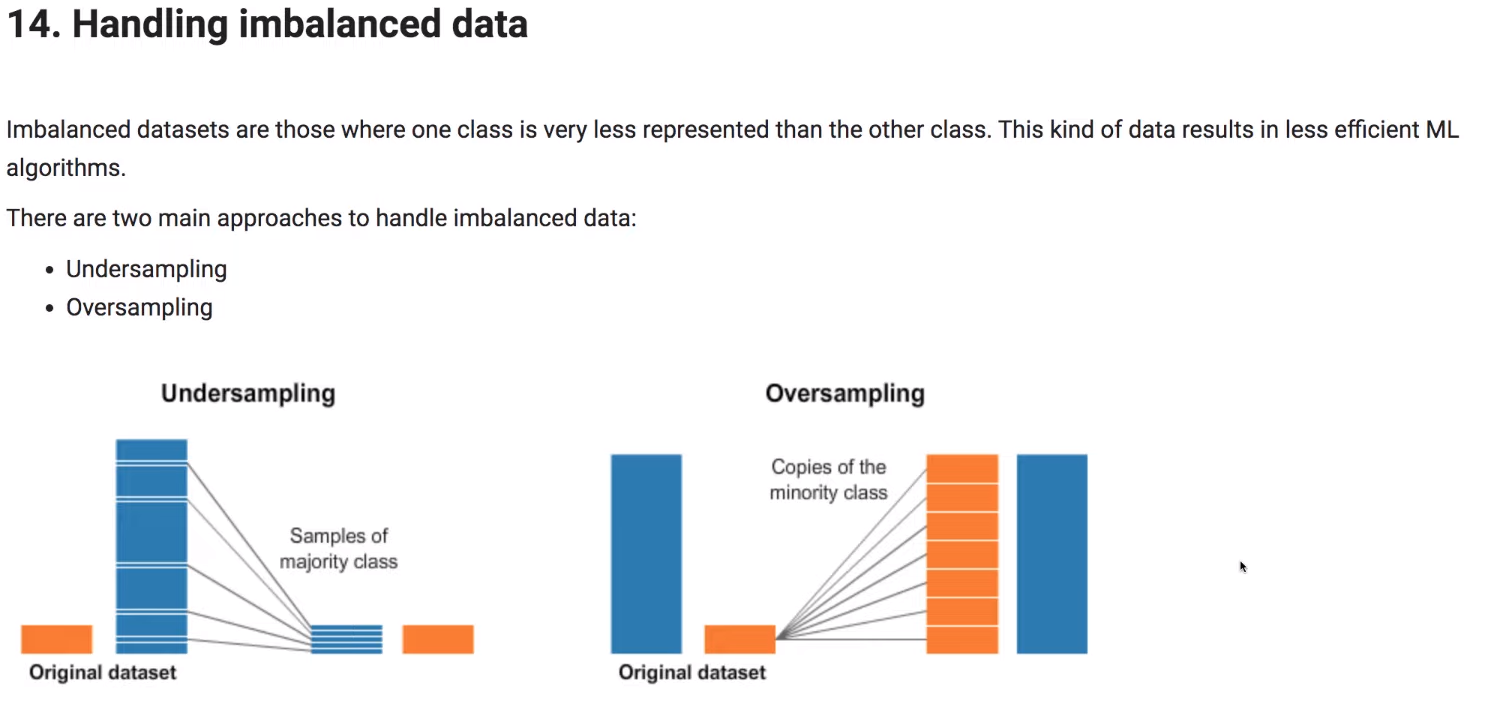
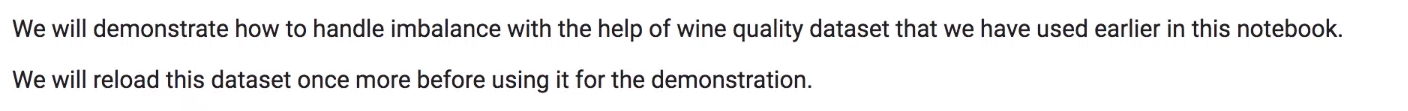

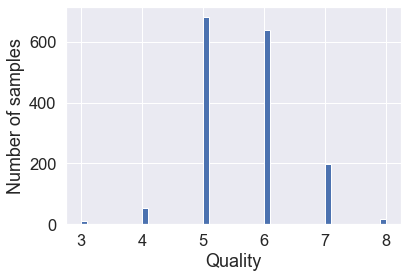

In [292]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# display the histogram of the target variable 'quality'
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [293]:
wine_data.shape

(1599, 12)

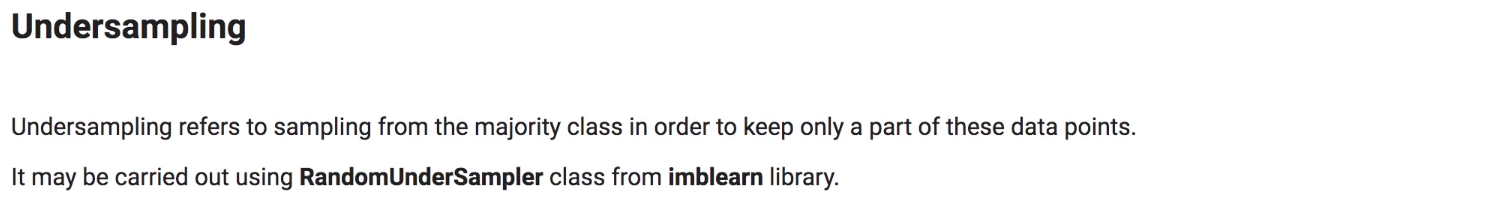

In [280]:
from imblearn.under_sampling import RandomUnderSampler

In [281]:
# class count
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# Separate classes
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]

# print the shape of the classes
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


In [282]:
from collections import Counter # Allows to count the items in an iterable list

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
X_rus, y_rus = undersample.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_rus))

Original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resampled dataset shape: Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


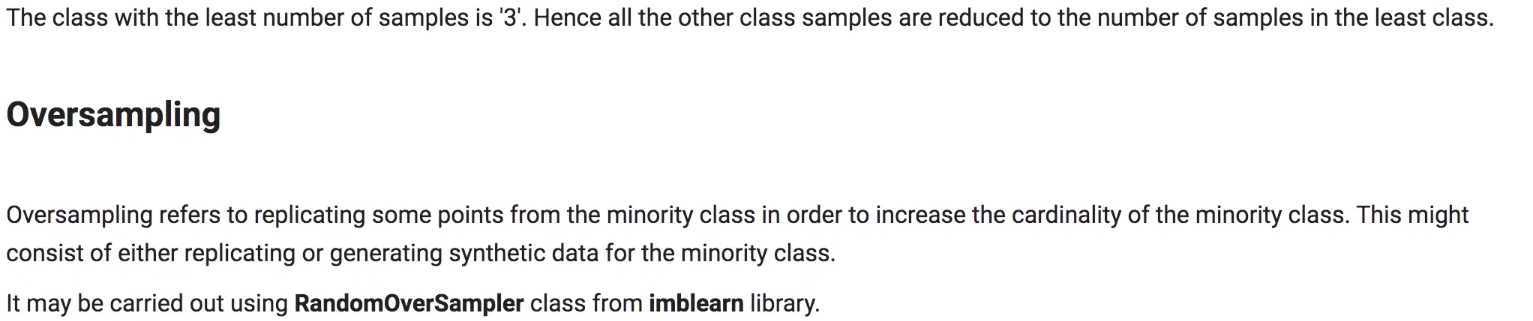

In [283]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_ros))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resampled dataset shape: Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [284]:
print(X_ros.shape[0] - X.shape[0], 'New random points generated with RandomOverSampler')

2487 New random points generated with RandomOverSampler


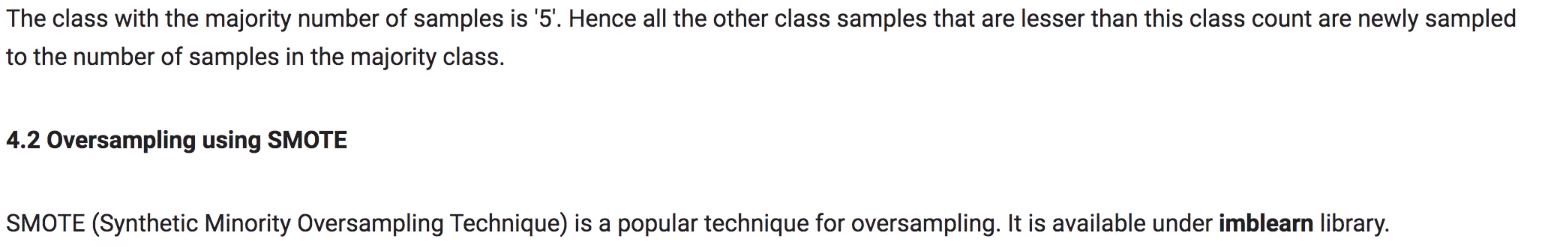

In [285]:
from imblearn.over_sampling import SMOTE

In [286]:
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [287]:
print(X_sm.shape[0] - X.shape[0], 'New random points generated with SMOTE')

2487 New random points generated with SMOTE


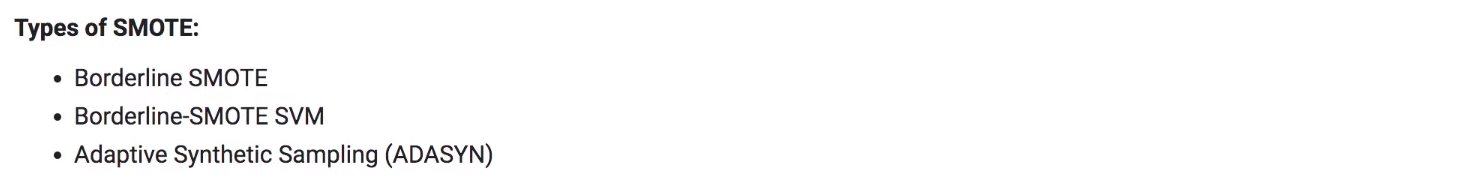